In [1]:
import torch
import cv2
import numpy as np
import pandas as pd
from glob import glob
import csv
from collections import OrderedDict
import sys
# sys.path.append('./QC')
sys.path.append('./RF')
# from qc_network import QC_Net
from models.retinaface import RetinaFace
from data import cfg_mnet
from test_retina import infer
import os
from tqdm import tqdm
import glob
# from eye_net import *
# from eye_dataset import Eye_Dataset
import argparse
from torch.utils.data import DataLoader
import torch.distributed as dist
import matplotlib.pyplot as plt
import random
from alive_progress import alive_it
from alive_progress import config_handler
config_handler.set_global(length = 20, force_tty = True)
from pathlib import Path
from scipy.special import softmax
from tqdm.contrib.concurrent import process_map
from torchvision.transforms import Compose, ToTensor
import matplotlib.patches as patches

/home/jovyan/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# face detector model
cfg = cfg_mnet
mode = 'test'

net = RetinaFace(cfg=cfg, phase=mode)
model_weight_path = './RF/weights/mobilenet0.25_best.pth'

state_dict = torch.load(model_weight_path, map_location=torch.device('cpu'))
new_state_dict = OrderedDict()

for k, v in state_dict.items():
    head = k[:7]
    if head == 'module.':
        name = k[7:]  # remove `module.`
    else:
        name = k
    new_state_dict[name] = v

net.load_state_dict(new_state_dict)

device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = net.to(device)
_ = net.eval()

confidence_threshold = cfg['infer_confidence_threshold']
nms_threshold = cfg['infer_nms_threshold']  # 0.4
iou_thresh = cfg['infer_iou_thresh']  # 0.5
img_dim = cfg['infer_image_size']

confidence score: 0.9994794726371765
full dets: [[108.25528   198.2076    323.6994    488.7236      0.9994795 161.17097
  297.30466   271.22568   294.27164   218.46443   376.82565   180.53311
  424.47137   258.8144    421.83716  ]]


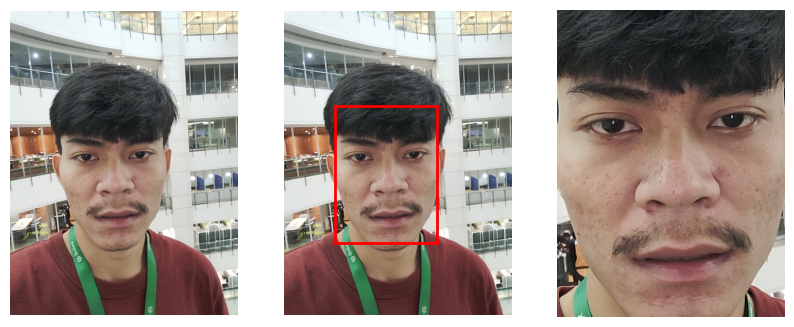

In [12]:
# inference

# set imagePath
image_path='/home/jovyan/Eye 3/Eye/train/RF/test.png'
dets, img_raw = infer(net, image_path, img_dim, device, cfg, confidence_threshold, nms_threshold)

try:
    facebox=dets[0][:4]
    confidence=dets[0][4]
    print(f'confidence score: {confidence}')
    print(f'full dets: {dets}')
    
    fig,ax=plt.subplots(1,3,figsize=(10,10))
    ax[0].imshow(cv2.cvtColor(img_raw,cv2.COLOR_BGR2RGB))
    ax[0].axis('off')

    l,t,r,b=facebox
    l,t,r,b=int(l),int(t),int(r),int(b)

    rect=patches.Rectangle((l,t),r-l,b-t,linewidth=2,edgecolor="r",facecolor='none') #format is (xmin,ymin),width,height
    ax[1].imshow(cv2.cvtColor(img_raw,cv2.COLOR_BGR2RGB))
    ax[1].axis('off')
    ax[1].add_patch(rect)

    ax[2].imshow(cv2.cvtColor(img_raw[t:b,l:r],cv2.COLOR_BGR2RGB))
    ax[2].axis('off')

    plt.show()
except:
    print('no face detected')
    print(f'full dets: {dets}')

In [13]:
# inference

# set imagePath
image_path='/home/jovyan/Eye 3/Eye/train/RF/20231108_145743.jpg'

dets, img_raw = infer(net, image_path, img_dim, device, cfg, confidence_threshold, nms_threshold)

try:
    facebox=dets[0][:4]
    confidence=dets[0][4]
    print(f'confidence score: {confidence}')
    print(f'full dets: {dets}')
    
    fig,ax=plt.subplots(1,3,figsize=(10,10))
    ax[0].imshow(cv2.cvtColor(img_raw,cv2.COLOR_BGR2RGB))
    ax[0].axis('off')

    l,t,r,b=facebox
    l,t,r,b=int(l),int(t),int(r),int(b)

    rect=patches.Rectangle((l,t),r-l,b-t,linewidth=2,edgecolor="r",facecolor='none') #format is (xmin,ymin),width,height
    ax[1].imshow(cv2.cvtColor(img_raw,cv2.COLOR_BGR2RGB))
    ax[1].axis('off')
    ax[1].add_patch(rect)

    ax[2].imshow(cv2.cvtColor(img_raw[t:b,l:r],cv2.COLOR_BGR2RGB))
    ax[2].axis('off')

    plt.show()
except:
    print('no face detected')
    print(f'full dets: {dets}')

no face detected
full dets: []


Invalid SOS parameters for sequential JPEG


# check num images from background data collection

In [5]:
root_path='/home/jovyan/data/aurora/background_data_collection'
names=os.listdir(root_path)
names.remove('.ipynb_checkpoints')
names.remove('__MACOSX')

print('background data collection')
print('total num: ',len(glob.glob('/home/jovyan/data/aurora/background_data_collection/**/*.jpg')))
print()
for name in names:
    print(name,len(glob.glob(f'/home/jovyan/data/aurora/background_data_collection/{name}/*.jpg')))

background data collection
total num:  1252

jerron 245
haidi 200
zhitao 205
daryl 202
adithya 200
chenze 200


In [1]:
path

NameError: name 'path' is not defined

In [4]:
import os
folder='/home/jovyan/data/vol_1/liveness_files/selfie_images'
len(os.listdir(folder))
# see if can use some eyes for eye blink

667078

In [5]:
import glob
len(glob.glob(folder+'/*.jpg'))

667077

In [6]:
for f in os.listdir(folder):
    if not f.endswith('.jpg'):
        print(f)

.ipynb_checkpoints


In [8]:
import os
folder='/home/jovyan/data/vol_3/face_detection_files/face_detection_v1_1/widerface/train'
len(os.listdir(folder))

5

In [4]:
import glob
len(glob.glob(folder+'/*.jpg'))

0

In [1]:
import pandas as pd
check=pd.read_csv('~/Eye 3/Eye/data/v2.18/v2.18_data_trainval_results.csv')
check

/tmp/ipykernel_265/573040451.py:2: DtypeWarning: Columns (9,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  check=pd.read_csv('~/Eye 3/Eye/data/v2.18/v2.18_data_trainval_results.csv')


level_0  new_label  glasses  label    index  \
0          1.0        NaN      0.0   open      1.0   
1          3.0        NaN      1.0   open      3.0   
2          5.0        NaN      0.0   open      5.0   
3          6.0        NaN      0.0   open      6.0   
4          7.0        NaN      0.0   open      7.0   
...        ...        ...      ...    ...      ...   
18405      NaN        NaN      0.0  close  34208.0   
18406      NaN        NaN      0.0   open  34213.0   
18407      NaN        NaN      0.0   open  34213.0   
18408      NaN        NaN      1.0   open  34214.0   
18409      NaN        NaN      1.0   open  34214.0   

                                              image_path split_type  \
0      /home/jovyan/data/vol_1/liveness_files/selfie_...      train   
1      /home/jovyan/data/vol_1/liveness_files/Aurora ...      train   
2      /home/jovyan/data/vol_1/liveness_files/selfie_...      train   
3      /home/jovyan/data/vol_1/liveness_files/selfie_...      train   
4      /home/jovyan/data/vol_1/liveness_files/selfie_...      train   
...                                                  ...        ...   
18405  /home/jovyan/data/liveness/datasets/datatang/d...        val   
18406  /home/jovyan/data/liveness/datasets/datatang/d...        val   
18407  /home/jovyan/data/liveness/datasets/datatang/d...        val   
18408  /home/jovyan/data/liveness/datasets/datatang/d...        val   
18409  /home/jovyan/data/liveness/datasets/datatang/d...        val   

                       bbox                                         source  \
0      [246, 170, 311, 235]                         original_old_v1.3_data   
1      [233, 226, 303, 296]  new_liveness_data_from_open+glasses_labelling   
2      [269, 183, 334, 248]                         original_old_v1.3_data   
3      [356, 196, 473, 313]                         original_old_v1.3_data   
4      [470, 263, 662, 455]                         original_old_v1.3_data   
...                     ...                                            ...   
18405  [239, 269, 324, 354]                                       datatang   
18406  [111, 266, 198, 353]                                       datatang   
18407  [241, 264, 328, 351]                                       datatang   
18408  [140, 257, 223, 340]                                       datatang   
18409  [264, 262, 346, 345]                                       datatang   

      person_name  ...                           image_name  \
0             NaN  ...                                  NaN   
1             NaN  ...                                  NaN   
2             NaN  ...                                  NaN   
3             NaN  ...                                  NaN   
4             NaN  ...                                  NaN   
...           ...  ...                                  ...   
18405         NaN  ...                eyes-closed_color.jpg   
18406         NaN  ...                     normal_color.jpg   
18407         NaN  ...                     normal_color.jpg   
18408         NaN  ...  wearing-colorless-glasses_color.jpg   
18409         NaN  ...  wearing-colorless-glasses_color.jpg   

                                  retina_face_mobile_raw  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
18405  [[95.5627670288086, 158.49696350097656, 348.79...   
18406  [[95.4038314819336, 153.11070251464844, 351.39...   
18407  [[95.4038314819336, 153.11070251464844, 351.39...   
18408  [[120.38845825195312, 154.60739135742188, 369....   
18409  [[120.38845825195312, 154.60739135742188, 369....   

                                                landmark  \
0                             